## Import libraries and data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import time
import seaborn as sns
import concurrent.futures
import logging
import threading
from math import sqrt

In [2]:
marker = time.time()
df = pd.read_csv('data/fixed_data.csv')
print(f'Read dataset in {round(time.time()-marker, 0)} seconds.')

Read dataset in 66.0 seconds.


## Creating Binray Purchase/Product Vectors

In [11]:
x = df.city.unique()
x.sort()

In [7]:
distance_function = lambda x: sqrt(2*(1-x))

In [17]:
data = df[:1000000].copy()

In [19]:
baskets = data.basket_id.unique()
print(f'There are {len(baskets):,} unique baskets.')
products = data['product'].unique()
print(f'There are {len(products):,} unique products.')

There are 473,641 unique baskets.
There are 40 unique products.


In [51]:
def in_basket(b_id):
    basket_ls = data.loc[data.basket_id == b_id]['product']
    return [1 if p in basket_ls.values else 0 for p in products]

In [48]:
in_basket_old = lambda b_id: [0 if data.loc[(data.basket_id == b_id) & (data['product'] == p), 'product'].empty else 1 for p in products]

In [61]:
num_tests = 10
start = time.time()
for i in range(num_tests):
    temp = in_basket(baskets[i])
timed_test = (time.time() - start)/num_tests


In [62]:
estimate = round((timed_test * len(baskets))/(60*60))
print(f'Given that one purchase vector build takes - on average - {round(timed_test,3)} seconds:\nThe approximate time to build a ({len(baskets):,} x {len(products)}) matrix is {estimate:,} hours.')

Given that one purchase vector build takes - on average - 0.049 seconds:
The approximate time to build a (473,641 x 40) matrix is 6 hours.


In [5]:
def heatmap(cmat, xticks, yticks, cmap='gray'):
    fig, ax = plt.subplots()
    sns.heatmap(cmat, ax=ax, xticklabels=xticks, yticklabels=xticks, cmap=cmap)
    ax.set_yticklabels(products)
    plt.subplots_adjust()
    plt.gcf().set_size_inches(10,10)
    plt.title('Correlation Matrix')
    plt.show()

In [12]:
start = time.time()
purchase_vectors = []
# purchase_vectors.extend([in_basket(b_id) for b_id in baskets])

total_baskets = len(baskets)
for i in range(total_baskets):
    purchase_vectors.append(in_basket(baskets[i]))
    if i % 10000 == 0:
        print(f'{round(i/total_baskets, 3)}% complete [{i:,}/{total_baskets:,}] [{round(time.time()-start):,} seconds].')
    
print(f'Finished a {len(baskets)}x{len(products)} matrix in {round((time.time()-start)/3600,1)} hours.')

0.0% complete [0/473,641] [0 seconds.]
0.021% complete [10000/473,641] [494 seconds.]
0.042% complete [20000/473,641] [997 seconds.]
0.063% complete [30000/473,641] [1,504 seconds.]
0.084% complete [40000/473,641] [2,010 seconds.]
0.106% complete [50000/473,641] [2,506 seconds.]
0.127% complete [60000/473,641] [2,999 seconds.]
0.148% complete [70000/473,641] [3,497 seconds.]
0.169% complete [80000/473,641] [3,995 seconds.]
0.19% complete [90000/473,641] [4,490 seconds.]
0.211% complete [100000/473,641] [4,985 seconds.]
0.232% complete [110000/473,641] [5,481 seconds.]
0.253% complete [120000/473,641] [6,000 seconds.]
0.274% complete [130000/473,641] [6,496 seconds.]
0.296% complete [140000/473,641] [6,992 seconds.]
0.317% complete [150000/473,641] [7,500 seconds.]
0.338% complete [160000/473,641] [8,007 seconds.]
0.359% complete [170000/473,641] [8,514 seconds.]
0.38% complete [180000/473,641] [9,021 seconds.]
0.401% complete [190000/473,641] [9,529 seconds.]
0.422% complete [200000/47

In [13]:
purchase_vectors = pd.DataFrame(purchase_vectors)
purchase_vectors.to_csv('data/purchase_vectors_1m.csv', index=False)

In [14]:
purchase_vectors.shape

(473641, 40)

In [3]:
pvec = pd.read_csv('data/purchase_vectors_1m.csv')

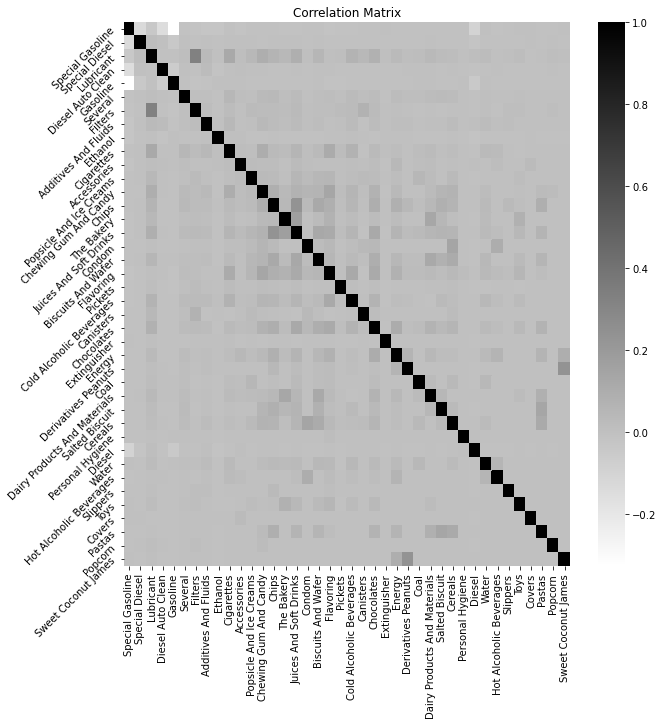

In [20]:
heatmap(pvec.corr(), xticks=products, yticks=products, cmap='binary')

In [35]:
corr = pvec.corr()
# Generate a mask for the upper triangle
A2 = NP.triu(corr)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(A2, cmap='binary',
            square=True, xticklabels=products, yticklabels=products)

NameError: name 'NP' is not defined

In [25]:
distanced = pvec.apply(np.vectorize(distance_function))

In [28]:
distanced.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,...,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214
1,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,...,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214
2,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,...,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214
3,1.414214,1.414214,0.000000,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,...,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214
4,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,...,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214
